<a href="https://colab.research.google.com/github/juricap/jpc/blob/main/Copy_of_fastai_UNet_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/deep/cmasks.zip

Streaming output truncated to the last 5000 lines.
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_084.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_097.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_104.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_107.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_115.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_123.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_124.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_127.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_maskcor_135.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_000.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_001.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_002.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_003.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_004.png  
  inflating: cmasks/220323_x265_Mucasi_cam6_mask_005.png  
  inflating: cmasks/220323_x265_Mucas

In [ ]:
from fastai.vision.all import *
#from torchvision.models import resnet18, squeezenet1_0, squeezenet1_1, mobilenet_v2

# Define path
path = Path('cmasks/')
fnames = [ x for x in get_image_files(path) if '_roi_' in x.name ]

def get_rois(pth):
    return [ x for x in get_image_files(pth) if '_roi_' in x.name ]

# Define function to label the masks
def label_func(x):
    return path/f"{x.stem.replace('roi', 'maskcor')}{x.suffix}"

# Define function to binarize masks
def binarize_mask(x: PILMask):
    arr = np.array(x)
    arr = np.where(arr > 0, 1, 0).astype(np.uint8)
    return PILMask.create(arr)


# Define DataBlock
codes = np.array(["Background", "Object"])
blocks = (ImageBlock, MaskBlock(codes))
splitter = RandomSplitter(valid_pct=0.4, seed=42)
item_tfms = [Resize(256), binarize_mask]

dblock = DataBlock(blocks=blocks,
                   get_items=get_rois,
                   get_y=label_func,
                   splitter=splitter,
                   item_tfms=item_tfms,
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

# Create dataloaders
dls = dblock.dataloaders(path, bs=8)

# Create a learner with a pre-trained model
#learn = unet_learner(dls, resnet18)
learn = unet_learner(dls, resnet11)

# Fine-tune the model
#learn.fine_tune(10)
#learn.lr_find()


NameError: ignored

In [ ]:
learn.fine_tune(0)

epoch,train_loss,valid_loss,time
0,0.038070,0.034832,01:53


In [ ]:
learn.save('/content/drive/MyDrive/deep/fastai_worm_seg')

Path('/content/drive/MyDrive/deep/fastai_worm_seg.pth')

In [ ]:
dls.valid.

<Axes: title={'center': 'predicted mask'}>

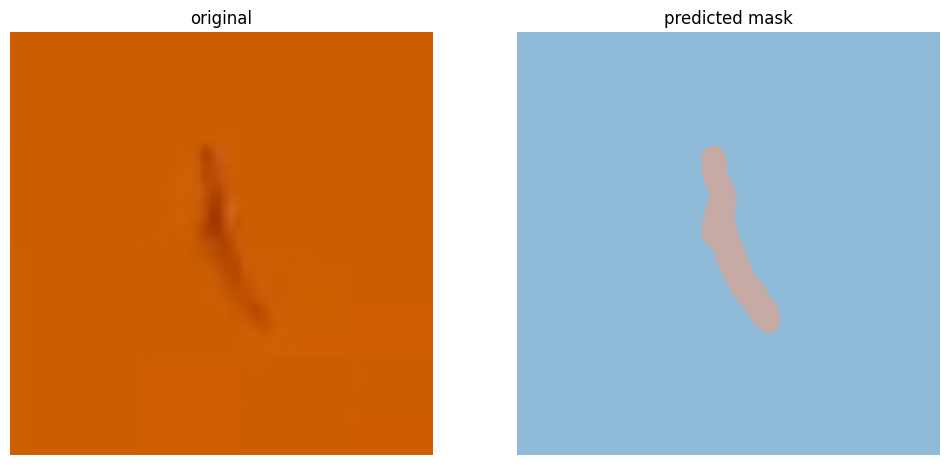

In [ ]:
import glob
import random

files = glob.glob('cmasks/*_roi_*.png')
#files = 'cmasks/223011_x265_GF_cam1_roi_015.png'

img = PILImage.create(random.choice(files))
pred = learn.predict(img)
# Display original image and the mask side by side
_,axs = plt.subplots(1,3, figsize=(12,12))
img.show(ctx=axs[0], title='original')
pred[0].show(ctx=axs[1], title='predicted mask')


<Axes: title={'center': 'predicted mask'}>

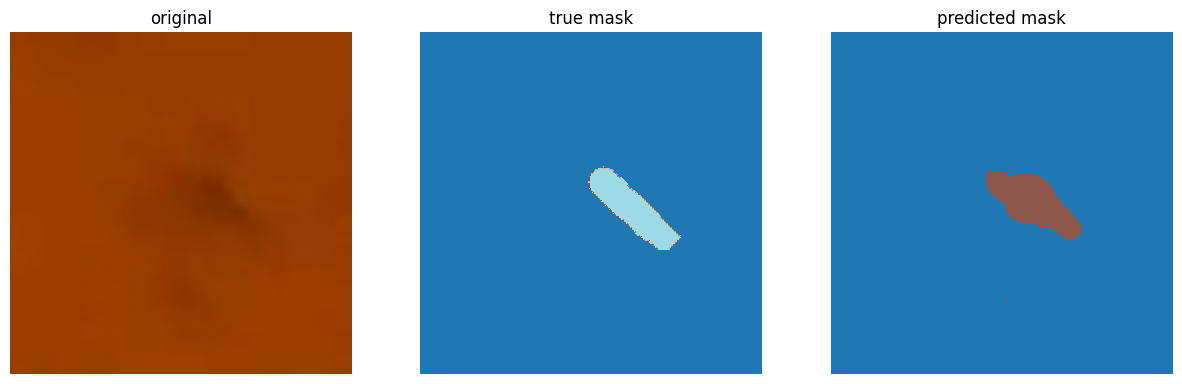

In [ ]:
import random

num_samples = len(dls.valid.dataset)
random_index = random.randint(0, num_samples - 1)
image, label = dls.valid.dataset[random_index]

# Predict the mask for the image
pred = learn.predict(image)

# Display the original image, true mask and the predicted mask
_, axs = plt.subplots(1,3, figsize=(15,7))
image.show(ctx=axs[0], title='original')
label.show(ctx=axs[1], title='true mask', alpha=1)
pred[0].show(ctx=axs[2], title='predicted mask', alpha=1)


In [ ]:
learn.save('/content/drive/MyDrive/deep/fastai_worm_seg')

Path('/content/drive/MyDrive/deep/fastai_worm_seg.pth')